In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
np.random.seed(440) 
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [215]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test_d.csv")
gender_submission = pd.read_csv('gender_submission.csv') # example of what a submission should look like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
test_i=pd.read_csv("test_d.csv")
test_i['Fare'].mean()

35.62718803827748

In [36]:
train.shape

(891, 12)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
ttrain=train.drop(['Age','Cabin','Name','Ticket','PassengerId'],axis=1)
ttrain=ttrain.dropna()
print(ttrain.shape)
y_train =ttrain['Survived']
X_train = ttrain.drop('Survived',axis=1)

(889, 7)


In [48]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
y_train.shape

(889,)

In [49]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [60]:
dx_train = pd.get_dummies(X_train,columns=['Pclass','SibSp','Parch','Sex','Embarked'] ,drop_first=True)
dx_train.shape

(889, 18)

In [61]:
dx_train.head()

,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S
0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [98]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    prec = round(metrics.precision_score(y_train, train_pred) * 100, 2)
    reca = round(metrics.recall_score(y_train, train_pred) * 100, 2)
    f1 = round(metrics.f1_score(y_train, train_pred) * 100, 2)
   
    #report
    
    return train_pred, acc, acc_cv,prec, reca, f1

In [101]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log,precision,recall,f1 = fit_ml_algo(LogisticRegression(), 
                                                               dx_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy:         %s" % acc_log)
print("Accu CV 10-Fold: %s" % acc_cv_log)
print("Running Time:    %s" % datetime.timedelta(seconds=log_time))
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy:         79.75
Accu CV 10-Fold: 78.97
Running Time:    0:00:06.605278
precision Score: 74.92
recall score:    67.65
F1 Score:        71.1


In [103]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, precision,recall,f1 = fit_ml_algo(KNeighborsClassifier(), 
                                                  _train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 83.35
Accuracy CV 10-Fold: 74.92
Running Time: 0:00:06.757153
precision Score: 70.1
recall score:    60.0
F1 Score:        64.66


In [104]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, precision,recall,f1 = fit_ml_algo(GaussianNB(), 
                                                                      dx_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 42.86
Accuracy CV 10-Fold: 41.51
Running Time: 0:00:08.096519
precision Score: 39.36
recall score:    97.94
F1 Score:        56.16


In [105]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, precision,recall,f1 = fit_ml_algo(LinearSVC(),
                                                               dx_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 79.53
Accuracy CV 10-Fold: 77.28
Running Time: 0:00:07.233505
precision Score: 73.0
recall score:    64.41
F1 Score:        68.44


In [106]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd, precision,recall,f1 = fit_ml_algo(SGDClassifier(), 
                                                  dx_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 62.32
Accuracy CV 10-Fold: 62.77
Running Time: 0:00:06.700042
precision Score: 52.09
recall score:    32.94
F1 Score:        40.36


In [107]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, precision,recall,f1 = fit_ml_algo(DecisionTreeClassifier(), 
                                                                dx_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.43
precision Score: 76.95
recall score:    69.71
F1 Score:        73.15


In [123]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, precision,recall,f1 = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       dx_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("precision Score: {}".format(precision))
print("recall score:    {}".format(recall))
print("F1 Score:        {}".format(f1))

Accuracy: 86.28
Accuracy CV 10-Fold: 81.1
precision Score: 80.71
recall score:    66.47
F1 Score:        72.9


In [111]:
# Define the categorical features for the CatBoost model
cat_features = np.where(dx_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

In [116]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.28
0,KNN,83.35
1,Logistic Regression,79.75
4,Linear SVC,79.53
3,Stochastic Gradient Decent,62.32
2,Naive Bayes,42.86


In [117]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
             ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,81.10
5,Decision Tree,80.43
1,Logistic Regression,78.97
4,Linear SVC,77.28
0,KNN,74.92
3,Stochastic Gradient Decent,62.77
2,Naive Bayes,41.51


In [121]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,col,imp
1,Pclass_2,0.000000
14,Parch_6,0.000000
11,Parch_3,0.000000
13,Parch_5,0.002676
3,SibSp_1,0.008091
6,SibSp_4,0.009472
4,SibSp_2,0.010338
7,SibSp_5,0.015353
9,Parch_1,0.015535
5,SibSp_3,0.015628


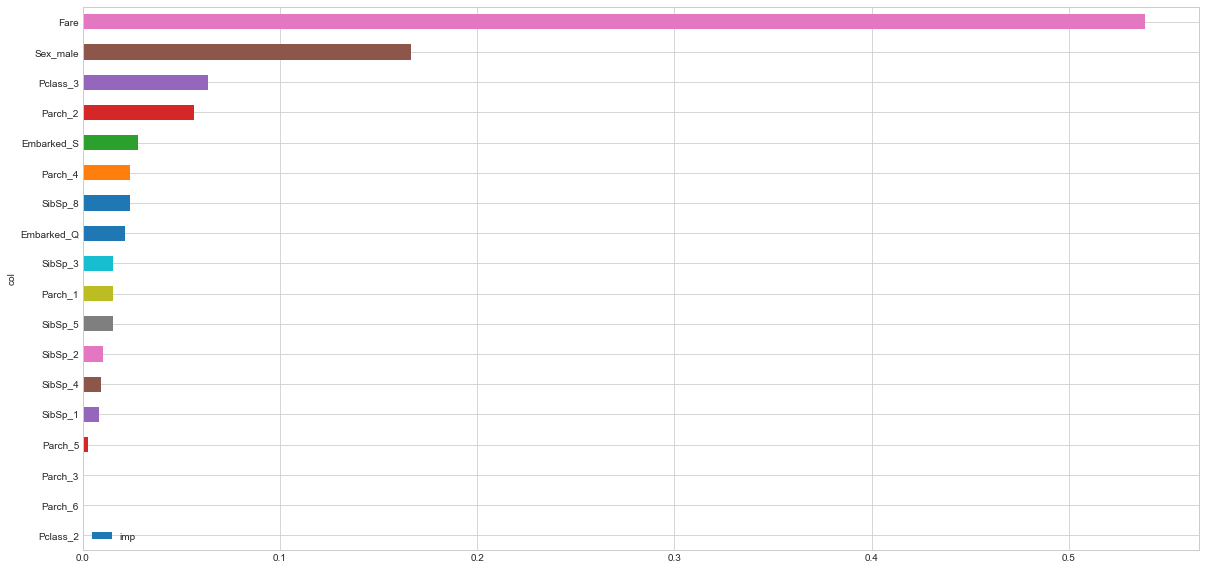

In [152]:
# Plot the feature importance scores
gbmodel = GradientBoostingClassifier().fit(dx_train, y_train)
feature_importance(gbmodel, dx_train)

In [217]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [218]:
print(test.isnull().sum())
print(test.shape)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
(418, 11)


In [219]:
test=test.drop(['Age','Cabin','Name','Ticket','PassengerId'],axis=1)
print(test.shape)


(418, 6)


In [220]:
test = pd.get_dummies(test,columns=['Pclass','SibSp','Parch','Sex','Embarked'] ,drop_first=True)
test.shape

(418, 19)

In [208]:
dx_train.head()

,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S
0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [221]:
test = test.drop('Parch_9',axis=1)
test.head()

,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S
0,7.8292,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,7.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,12.2875,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [222]:
# Make a prediction using the gBoost model on the wanted columns
predictions = gbmodel.predict(test)

In [223]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_i['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [225]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Converted Survived column to integers.
Submission dataframe is the same length as test (418 rows).


In [229]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('gboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [231]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("gboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
